# DL

In [1]:
# pip install tensorflow
# pip install keras

^C


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
np.random.seed(0)
tf.random.set_seed(0)

In [6]:
Data_set = np.loadtxt("./dataset/ThoraricSurgery.csv", delimiter = ",")

In [7]:
X = Data_set[:, 0:17]
Y = Data_set[:, 17]

In [8]:
# 구조 결정 Sequential() 층을 쌓을 수 있게 해줌
# 1층에 input_dim이 반드시 들어감
model = Sequential()
model.add(Dense(30, input_dim = 17, activation = "relu")) # 30개의 노드
model.add(Dense(1, activation = "sigmoid")) # 0이냐 1이냐는 시그모이드, 하나의 층

In [9]:
# 딥러닝 실행
# optimizer 컴파일을 뭘로할지, metrics = accuracy 나중에 확인
# 사 사, 생 생, 생 사, 사 생 matrix로 만듦, 정확도?
# loss는 작을 수록 좋음 (예측 - 실제) 제곱
# accuracy는 좋을 수록 좋음
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(X, Y, epochs = 100, batch_size = 10)

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 4.4059 - accuracy: 0.6255  
Epoch 2/100
47/47 [==============================] - 0s 775us/step - loss: 0.6216 - accuracy: 0.8298
Epoch 3/100
47/47 [==============================] - 0s 810us/step - loss: 0.5207 - accuracy: 0.8362
Epoch 4/100
47/47 [==============================] - 0s 779us/step - loss: 0.4764 - accuracy: 0.8489
Epoch 5/100
47/47 [==============================] - 0s 773us/step - loss: 0.4946 - accuracy: 0.8404
Epoch 6/100
47/47 [==============================] - 0s 764us/step - loss: 0.5107 - accuracy: 0.8404
Epoch 7/100
47/47 [==============================] - 0s 794us/step - loss: 0.4950 - accuracy: 0.8383
Epoch 8/100
47/47 [==============================] - 0s 838us/step - loss: 0.5009 - accuracy: 0.8489
Epoch 9/100
47/47 [==============================] - 0s 721us/step - loss: 0.4957 - accuracy: 0.8319
Epoch 10/100
47/47 [==============================] - 0s 751us/step - loss: 0.4559 - accura

47/47 [==============================] - 0s 824us/step - loss: 0.4166 - accuracy: 0.8532
Epoch 82/100
47/47 [==============================] - 0s 781us/step - loss: 0.4084 - accuracy: 0.8447
Epoch 83/100
47/47 [==============================] - 0s 735us/step - loss: 0.4271 - accuracy: 0.8489
Epoch 84/100
47/47 [==============================] - 0s 629us/step - loss: 0.4312 - accuracy: 0.8426
Epoch 85/100
47/47 [==============================] - 0s 764us/step - loss: 0.3922 - accuracy: 0.8468
Epoch 86/100
47/47 [==============================] - 0s 700us/step - loss: 0.4103 - accuracy: 0.8468
Epoch 87/100
47/47 [==============================] - 0s 752us/step - loss: 0.3968 - accuracy: 0.8532
Epoch 88/100
47/47 [==============================] - 0s 744us/step - loss: 0.4352 - accuracy: 0.8362
Epoch 89/100
47/47 [==============================] - 0s 697us/step - loss: 0.4136 - accuracy: 0.8574
Epoch 90/100
47/47 [==============================] - 0s 667us/step - loss: 0.4373 - accuracy: 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

mx = np.mean(x)
my = np.mean(y)

print(mx, my)

# 기울기 분모 = ((x-x의 평균 값)의 제곱의 합)
divisior = sum([(mx - i) ** 2 for i in x])
print(divisior)

# 기울기 분자 = ((x - x의 평균) * (y - y의 평균)) 합
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

div_end = top(x, mx, y, my)

print("분모 :", divisior)
print("분자 :", div_end)

a = div_end / divisior
# 기울기는 y의 평균 - (x의 평균 * 기울기)
b = my - (mx * a)

print("x는 {}, 절편은 {}".format(a, b))

5.0 90.5
20.0
분모 : 20.0
분자 : 46.0
x는 2.3, 절편은 79.0


### 선형회귀 - Linear Regression
- 최소제곱법

In [29]:
data = [[2, 81], [4, 93], [6, 91], [8, 97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

In [48]:
# mse : 평균 제곱 오차 구하기
fake_a_b = [3, 76]

data = [[2, 81], [4, 93], [6, 91], [8, 97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

In [57]:
def predict(x): # 예측 값
    return fake_a_b[0] * x + fake_a_b[1] # y = a*x+b (a:3, b:76)

def mse(y_hat, y): # 각 요소의 최소 제곱법(mse) 값
    return((y_hat - y) ** 2).mean() # (예측값 - 실제값) * 제곱

def mse_val(predict_result, y):  # 최소 제곱법 리스트에 담기
    return mse(np.array(predict_result), np.array(y))

In [59]:
predict_result = []  # 최소 제곱법 리스트

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부한 시간 : %.f, 실제 점수 : %.f, 예측 점수 : %.f"
          %(x[i], y[i], predict(x[i])))

print("mse 최종 값 : ", str(mse_val(predict_result, y)))
predict_result

공부한 시간 : 2, 실제 점수 : 81, 예측 점수 : 82
공부한 시간 : 4, 실제 점수 : 93, 예측 점수 : 88
공부한 시간 : 6, 실제 점수 : 91, 예측 점수 : 94
공부한 시간 : 8, 실제 점수 : 97, 예측 점수 : 100
mse 최종 값 :  11.0


[82, 88, 94, 100]

### 경사하강법 - Gradient Descent
- 기울기 a를 변화시키면서 순간 기울기가 0인 지점을 찾는 것, m
- 기울기가 +면 -로, -면 +로
- 학습률 ex)보폭

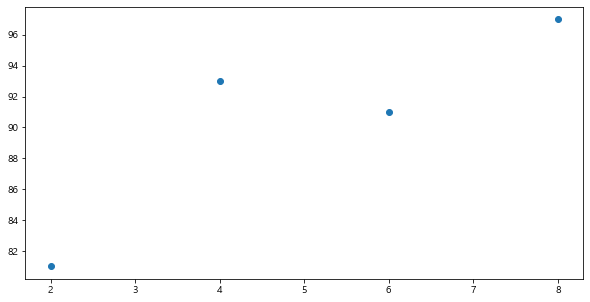

In [63]:
# 경사하강법을 이용한 a와 b구하기: 미분값이 최소화 되는 값 찾기
plt.figure(figsize = (10, 5))
plt.scatter(x, y)
plt.show()

In [86]:
# 기울기 a와 절편 b를 초기값 설정
a = 0
b = 0
# 학습률 = learning rate
lr = 0.06
# 횟수
epochs = 1000

x_data = np.array(x)
y_data = np.array(y)

In [87]:
for i in range(epochs + 1):
    y_pred = a * x_data + b # y의 예측 값
    error = y_data - y_pred # 오차를 y - yhat
    # 오차 함수를 a로 편미분
    a_diff = -(1/len(x_data)) * sum(x_data * (error))
    b_diff = -(1/len(x_data)) * sum(y_data - y_pred)
    
    a = a - lr * a_diff # 기울기 update
    b = b - lr * b_diff # 기울기 update
    
    if i % 100 == 0:
        print("epoch = %.f, 기울기 : %.04f, 절편 : %.04f" %(i, a, b))

epoch = 0, 기울기 : 27.8400, 절편 : 5.4300
epoch = 100, 기울기 : 7.0739, 절편 : 50.5117
epoch = 200, 기울기 : 4.0960, 절편 : 68.2822
epoch = 300, 기울기 : 2.9757, 절편 : 74.9678
epoch = 400, 기울기 : 2.5542, 절편 : 77.4830
epoch = 500, 기울기 : 2.3956, 절편 : 78.4293
epoch = 600, 기울기 : 2.3360, 절편 : 78.7853
epoch = 700, 기울기 : 2.3135, 절편 : 78.9192
epoch = 800, 기울기 : 2.3051, 절편 : 78.9696
epoch = 900, 기울기 : 2.3019, 절편 : 78.9886
epoch = 1000, 기울기 : 2.3007, 절편 : 78.9957


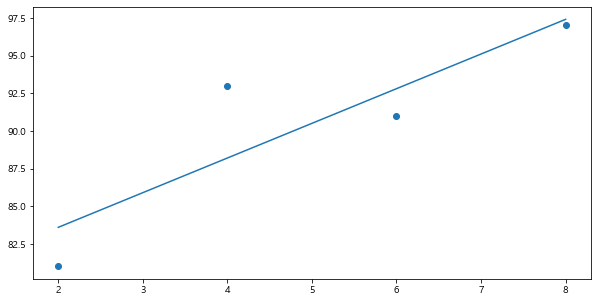

In [88]:
y_pred = a * x_data + b
plt.figure(figsize = (10, 5))
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

### 다중 선형 회귀

In [89]:
from mpl_toolkits import mplot3d

In [90]:
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

In [103]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

a1 = 0; a2 = 0; b = 0; 
epochs = 2600 # 학습 횟수
lr = 0.02

In [104]:
for i in range(epochs + 1):
    y_pred = a * x1_data + a2 * x2_data + b # y의 예측 값
    error = y_data - y_pred # 오차를 y - yhat
    # 오차 함수를 a로 편미분
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error))
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error))
    b_diff = -(1/len(y_data)) * sum(y_data - y_pred)
    
    a1 = a1 - lr * a1_diff # 기울기 update
    a2 = a2 - lr * a2_diff # 기울기 update
    b = b - lr * b_diff # 기울기 update
    
    if i % 100 == 0:
        print("epoch = %.f, 기울기1 : %.04f, 기울기2 : %.04f, 절편 : %.04f" 
              %(i, a1, a2, b))

epoch = 0, 기울기1 : 7.8996, 기울기2 : 3.6268, 절편 : 1.5799
epoch = 100, 기울기1 : 122.1291, 기울기2 : 14.1774, 절편 : 36.4406
epoch = 200, 기울기1 : 164.7250, 기울기2 : 8.8753, 절편 : 52.8790
epoch = 300, 기울기1 : 186.8604, 기울기2 : 5.8164, 절편 : 62.3627
epoch = 400, 기울기1 : 197.1916, 기울기2 : 4.0516, 절편 : 67.8340
epoch = 500, 기울기1 : 200.7128, 기울기2 : 3.0335, 절편 : 70.9905
epoch = 600, 기울기1 : 200.3051, 기울기2 : 2.4461, 절편 : 72.8116
epoch = 700, 기울기1 : 197.6308, 기울기2 : 2.1072, 절편 : 73.8622
epoch = 800, 기울기1 : 193.6488, 기울기2 : 1.9117, 절편 : 74.4683
epoch = 900, 기울기1 : 188.9124, 기울기2 : 1.7989, 절편 : 74.8180
epoch = 1000, 기울기1 : 183.7407, 기울기2 : 1.7339, 절편 : 75.0197
epoch = 1100, 기울기1 : 178.3179, 기울기2 : 1.6963, 절편 : 75.1361
epoch = 1200, 기울기1 : 172.7503, 기울기2 : 1.6747, 절편 : 75.2033
epoch = 1300, 기울기1 : 167.0991, 기울기2 : 1.6622, 절편 : 75.2420
epoch = 1400, 기울기1 : 161.3996, 기울기2 : 1.6550, 절편 : 75.2644
epoch = 1500, 기울기1 : 155.6724, 기울기2 : 1.6508, 절편 : 75.2773
epoch = 1600, 기울기1 : 149.9291, 기울기2 : 1.6484, 절편 : 75.2847
epoch = 170

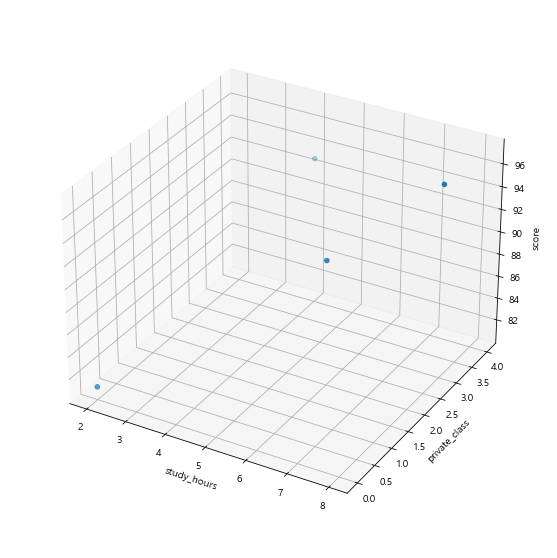

In [114]:
plt.figure(figsize = (10, 10))
ax = plt.axes(projection = "3d")
ax.set_xlabel("study_hours")
ax.set_ylabel("private_class")
ax.set_zlabel("score")
ax.dist = 11
ax.scatter(x1, x2, y)

plt.show()

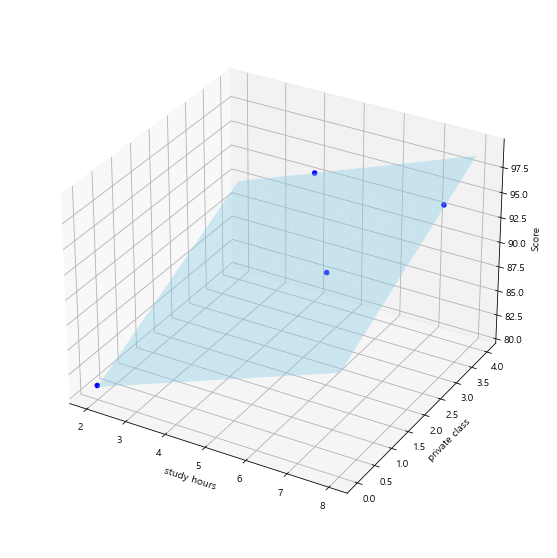

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기
import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1 = statm.add_constant(X)
results = statm.OLS(y,X_1).fit()

hour_class = pd.DataFrame(X,columns = ['study_hours','private_class'])
hour_class['Score'] = pd.Series(y)

model = statfa.ols(formula = 'Score ~ study_hours + private_class', 
                   data = hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),
                               hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),
                               hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY = results_formula.predict(exog=X_ax)

fig = plt.figure(figsize = (10, 10))
graph = fig.add_subplot(111, projection = '3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c = 'blue',marker = 'o', alpha = 1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride = 1, cstride = 1, color = 'skyblue', alpha = 0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()

### 실습

In [121]:
# x의 값은 random 함수를 통해 50개의 데이터를 추출 (1~10까지의 수만)
# y의 값은 random 함수를 통해 50개의 값을 생성 (100~200 까지)
# f(x) = ax + b를 구하는데, epoch을 2000번 100회마다 출력
x = np.random.randint(1, 10, size = 50)
y = np.random.randint(100, 200, size = 50)

In [130]:
a = 0; b = 0; 
epochs = 2600 # 학습 횟수
lr = 0.03

In [131]:
for i in range(epochs): # epoch 수 만큼 반복
    y_hat = a * x + b  #y를 구하는 식을 세웁니다
    error = y - y_hat  #오차를 구하는 식입니다.
    a_diff = -(2/len(x)) * sum(x * (error)) # 오차함수를 a로 미분한 값입니다. 
    b_diff = -(2/len(x)) * sum(error)  # 오차함수를 b로 미분한 값입니다. 
    a = a - lr * a_diff  # 학습률을 곱해 기존의 a값을 업데이트합니다.
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값을 업데이트합니다.
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=41.7708, 절편=8.9460
epoch=100, 기울기=10.0811, 절편=96.1411
epoch=200, 기울기=5.6639, 절편=121.4223
epoch=300, 기울기=4.4229, 절편=128.5251
epoch=400, 기울기=4.0742, 절편=130.5206
epoch=500, 기울기=3.9763, 절편=131.0813
epoch=600, 기울기=3.9487, 절편=131.2388
epoch=700, 기울기=3.9410, 절편=131.2830
epoch=800, 기울기=3.9388, 절편=131.2955
epoch=900, 기울기=3.9382, 절편=131.2990
epoch=1000, 기울기=3.9380, 절편=131.3000
epoch=1100, 기울기=3.9380, 절편=131.3002
epoch=1200, 기울기=3.9380, 절편=131.3003
epoch=1300, 기울기=3.9380, 절편=131.3003
epoch=1400, 기울기=3.9380, 절편=131.3003
epoch=1500, 기울기=3.9380, 절편=131.3003
epoch=1600, 기울기=3.9380, 절편=131.3003
epoch=1700, 기울기=3.9380, 절편=131.3003
epoch=1800, 기울기=3.9380, 절편=131.3003
epoch=1900, 기울기=3.9380, 절편=131.3003
epoch=2000, 기울기=3.9380, 절편=131.3003
epoch=2100, 기울기=3.9380, 절편=131.3003
epoch=2200, 기울기=3.9380, 절편=131.3003
epoch=2300, 기울기=3.9380, 절편=131.3003
epoch=2400, 기울기=3.9380, 절편=131.3003
epoch=2500, 기울기=3.9380, 절편=131.3003


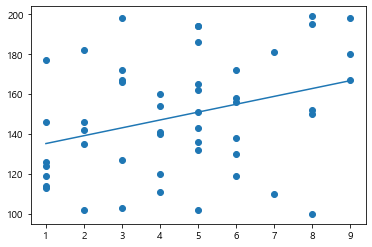

In [132]:
y_pred = a * x + b
plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)])
plt.show()